# <span style="color:darkblue"> Assignment 2: Formula 1 Analysis </span>

<font size = 4>
By: Tanya Jagdish

## <span style="color:darkblue"> Section A: Introduction </span>

Goal: compare top 3 constructors across two time periods (1981–2020, 2001–2020) and study Ferrari’s drivers and best year.

## <span style="color:darkblue"> Section B: Analyzing top 3 constructors </span>

### <span style = "color:darkblue"> Import libraries and loading datasets </span>

In [66]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = 4>

Datasets used + rationale for use

<font size = 2>

- constructor_results: gives points per race; allows summing up to season totals

- races: provides the year of each race (needed for time windows)

- constructors: gives constructor names (e.g., Ferrari, McLaren)

- drivers + qualifying: link drivers to Ferrari to count unique drivers

I chose these datasets because they directly answer the assignment questions; other datasets (e.g., pit_stops, lap_times) weren’t needed

In [67]:
#import necessary datasets

constructors = pd.read_csv("data_raw/constructors.csv")
constructor_results = pd.read_csv("data_raw/constructor_results.csv")   
races = pd.read_csv("data_raw/races.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
qual = pd.read_csv("data_raw/qualifying.csv")


### <span style = "color:darkblue"> Total points per season 

<font size = 2>

- Create a table to help calculate total points per constructor in each season/year

- Since the constructor_results table does not have a year column, we add one by merging it with the races table, using a common identifier as shown below

- This table will be helpful in calculating top 3 and average constructor score across the required time periods

In [68]:
#data checks before merging

#check for dtypes in both datasets
print(constructor_results['raceId'].dtypes)
print(races['raceId'].dtypes)


#Data length checks
print("")
print("constructor_results dataset")
print(len(constructor_results))
print(len(constructor_results['raceId'].unique()))
print(len(constructor_results['constructorId'].unique()))

print("")
print("races")
print(len(races['raceId'].unique()))

#note: races dataset has more unique raceId values than the constructor_results dataset
#we will do a left merge to retain all values from constructor_results dataset

int64
int64

constructor_results dataset
12170
1016
175

races
1102


In [ ]:
#create a seasons total points table for each constructor in each year

constructor_results_merged = pd.merge(constructor_results,
                                      races[['raceId', 'year']], #add year into constructor results table
                                        on='raceId',
                                        how='left')


#check for number of rows in the new table + data integrity
print("")
print(len(constructor_results_merged))
print(len(constructor_results_merged['raceId'].unique()))
print(len(constructor_results_merged['constructorId'].unique()))

#note: throughout the merge, I checked for missing values through data visualizer


12170
1016
175


In [70]:
#create season_totals table to calculate total points per constructor per year

season_totals = (
    constructor_results_merged
    .groupby(['year', 'constructorId'],       #group by year and constructorId, summing points
             as_index = False)['points']
             .sum() 
    .rename(columns={'points':'total_points'}) #rename points column to total_points
)

#check for number of rows in the new table
print("")
print(len(season_totals))
print(len(constructor_results_merged['raceId'].unique()))
print(len(constructor_results_merged['constructorId'].unique()))

#check for lowest and highest year
print("")
print(season_totals['year'].min())
print(season_totals['year'].max())


929
1016
175

1956
2022


In [73]:
#Add constructor names into season_totals
season_totals = season_totals.merge(
    constructors[['constructorId', 'name']], 
    on ='constructorId', 
    how ='left') 

#preview first few rows to make sure the merge worked
display(season_totals.head())

#check for duplicate years for each constructor
print("")
print(len(season_totals))
print(len(season_totals['year'].unique()))
print(len(season_totals['constructorId'].unique()))


,year,constructorId,total_points,name_x,name_y
0,1956,6,21.0,Ferrari,Ferrari
1,1956,105,28.0,Maserati,Maserati
2,1956,128,0.0,Gordini,Gordini
3,1958,6,61.0,Ferrari,Ferrari
4,1958,32,3.0,Team Lotus,Team Lotus



929
66
175


In [83]:
#getting to know the merged dataset

sorted_season_totals = season_totals.sort_values(by='total_points', ascending=False)

#preview highest and lowest scores
display(sorted_season_totals.head())
display(sorted_season_totals.tail())

,year,constructorId,total_points,name_x,name_y
866,2016,131,765.0,Mercedes,Mercedes
922,2022,9,759.0,Red Bull,Red Bull
896,2019,131,739.0,Mercedes,Mercedes
854,2015,131,703.0,Mercedes,Mercedes
843,2014,131,701.0,Mercedes,Mercedes


,year,constructorId,total_points,name_x,name_y
28,1959,120,0.0,Dunn,Dunn
27,1959,119,0.0,Moore,Moore
26,1959,118,0.0,Vanwall,Vanwall
25,1959,117,0.0,Aston Martin,Aston Martin
24,1959,115,0.0,Christensen,Christensen


### <span style = "color:darkblue"> Average and total points across time period

#### <span> 1981-2020 <span>

In [95]:
# total scores for each constructor in given time period
total_scores_1981_2020 = (season_totals
                          .query('year >= 1981 & year <= 2020')    #filter for years between 1981 and 2020
                          .groupby(['constructorId', 'name_x'], as_index=False)['total_points'] #group by constructorId, summing total_points
                            .sum()
                            .sort_values(by='total_points', ascending=False))

#mean total scores across constructors from 1981 to 2020
mean_total_1981_2020 = total_scores_1981_2020['total_points'].mean()

display(total_scores_1981_2020.head(3))
display(mean_total_1981_2020)

,constructorId,name_x,total_points
5,6,Ferrari,7374.0
56,131,Mercedes,5685.0
0,1,McLaren,5229.5


np.float64(532.2388059701492)

#### <span> 2001-2020 </span>

In [96]:
# total scores for each constructor in given time period
total_scores_2001_2020 = (season_totals
                          .query('year >= 2001 & year <= 2020')    #filter for years between 2001 and 2020
                          .groupby(['constructorId', 'name_x'], as_index=False)['total_points'] #group by constructorId, summing total_points
                            .sum()
                            .sort_values(by='total_points', ascending=False))

#mean total scores across constructors from 2001 to 2020
mean_total_2001_2020 = total_scores_2001_2020['total_points'].mean()

display(total_scores_2001_2020.head(3))
display(mean_total_2001_2020)

,constructorId,name_x,total_points
5,6,Ferrari,5862.0
24,131,Mercedes,5685.0
8,9,Red Bull,5043.5


np.float64(786.0142857142857)

### <span style = "color:darkblue"> Visualizing and analyzing results </span>

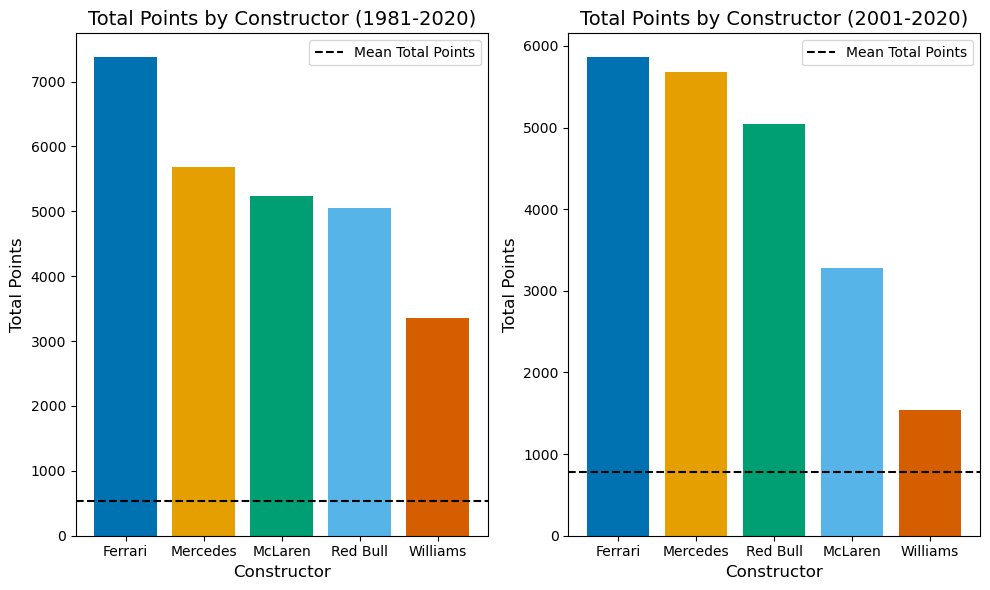

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# first panel
ax1.bar(
    total_scores_1981_2020['name_x'][:5],
    total_scores_1981_2020['total_points'][:5],
    color=['#0072B2', '#E69F00', '#009E73', '#56B4E9', '#D55E00']  # color-blind friendly
)
ax1.set_title('Total Points by Constructor (1981-2020)', fontsize=14)
ax1.set_xlabel('Constructor', fontsize=12)
ax1.set_ylabel('Total Points', fontsize=12)
ax1.axhline(mean_total_1981_2020, color='#000000', linestyle='--', label='Mean Total Points')
ax1.legend()

# second panel
ax2.bar(
    total_scores_2001_2020['name_x'][:5],
    total_scores_2001_2020['total_points'][:5],
    color=['#0072B2', '#E69F00', '#009E73', '#56B4E9', '#D55E00']
)
ax2.set_title('Total Points by Constructor (2001-2020)', fontsize=14)
ax2.set_xlabel('Constructor', fontsize=12)
ax2.set_ylabel('Total Points', fontsize=12)
ax2.axhline(mean_total_2001_2020, color='#000000', linestyle='--', label='Mean Total Points')
ax2.legend()

plt.tight_layout()
plt.show()

<font size = 3>
Analysis comments

- As seen above, the top three constructors between 1981-2020 are: Ferrari, Mercedes, McLaren
- Whereas, the top three constructors between 2001-2020 are: Ferrari, Mercedes, Red Bull
- In the second time period, Red Bull replaced McLaren on the leader board
- The top three scorers have significantly larger scores compared to the average across all constructs
- For instance, the top scores across both time periods scored more than 5000 points
- But the average total points was less than 1000 in both time periods


## <span style = "color:darkblue"> Section C: Ferrari drivers analysis <span>

### <span style = "color:darkblue"> Section C: Ferrari drivers analysis <span>

#### <span> Number of Ferrari drivers between 1981 and 2020 <span>

In [121]:
#create a variable for Ferrari's constructorId
ferrari_id = constructors.query("name == 'Ferrari'")['constructorId'].values[0]

#number of ferrari drivers between 1981 and 2020
ferrari_drivers = (
    qual.merge(races[['raceId', 'year']], on='raceId', how='left')  # Merge to get year
        .query('1981 <= year <= 2020 and constructorId == @ferrari_id')  # Filter for years and Ferrari)
)

ferrari_drivers.head(3)

#number of unique ferrari drivers between 1981 and 2020
num_unique_ferrari_drivers = ferrari_drivers['driverId'].nunique()
print(num_unique_ferrari_drivers)

#cross-checking with other methods
num_unique_ferrari_drivers_2 = ferrari_drivers.groupby('driverId').ngroups
num_unique_ferrari_drivers_2

13


13

- As seen above, Ferrari had 13 drivers between 1981 and 2020

- note that this is based on the following assumptions:

1. Each driver has a unique ID number
2. Each constructor has a unique ID number


#### <span> Ferrari's best years <span>

,year,total_points
883,2018,571.0


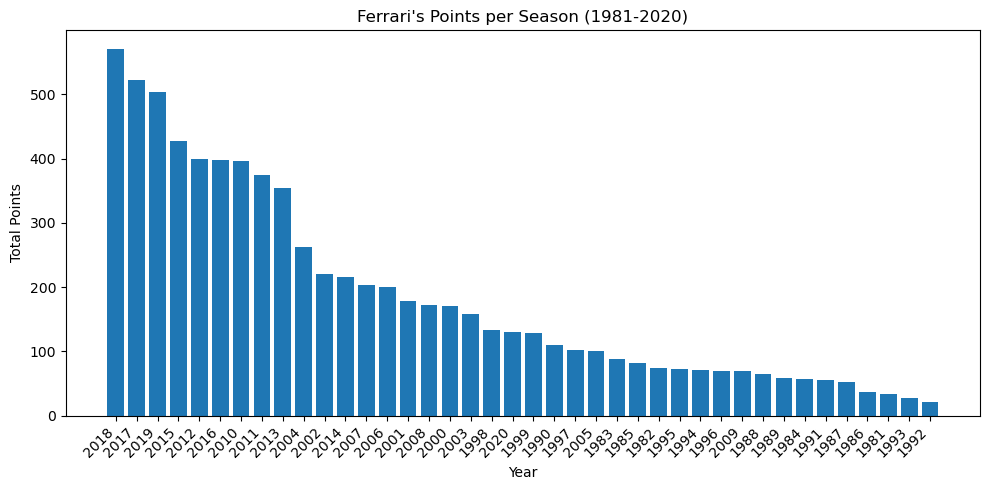

In [129]:
#creating a table of ferrari's total season points between 1981 and 2020
fer_years = (season_totals.query('constructorId == @ferrari_id and 1981 <= year <= 2020')
                           .loc[:, ['year','total_points']]
                           .sort_values(by='total_points', ascending=False))

display(fer_years.head(1))

#creating a bar chart to visualize ferrari's total points per season between 1981 and 2020
plt.figure(figsize=(10,5))
plt.bar(fer_years["year"].astype(str), fer_years["total_points"])
plt.title("Ferrari's Points per Season (1981-2020)")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Based on the analysis above, Ferrari's best season was in 2019, where it scored 571 points